#1 Data

###1.1 Getting data

In [1]:
import pandas as pd

data = pd.read_csv('dry_beans.csv')
#data['Type'].nunique()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['Class'])
data['Class'] = y
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,69892,1052.973,389.855771,228.671466,1.704873,0.809910,71139,298.310674,0.684270,0.982471,0.792142,0.765182,0.005578,0.001180,0.585504,0.998209,0
1,34584,704.813,272.448363,161.972223,1.682068,0.804091,34940,209.842123,0.678171,0.989811,0.874857,0.770209,0.007878,0.001710,0.593222,0.997839,3
2,72102,1072.061,377.616730,243.503876,1.550763,0.764314,73400,302.990293,0.708452,0.982316,0.788348,0.802375,0.005237,0.001339,0.643806,0.998390,0
3,207673,1755.004,659.273337,405.169271,1.627155,0.788863,210788,514.215398,0.733687,0.985222,0.847293,0.779973,0.003175,0.000725,0.608358,0.989893,1
4,200116,1773.379,636.108126,402.325059,1.581080,0.774577,202634,504.772825,0.773419,0.987574,0.799629,0.793533,0.003179,0.000777,0.629695,0.995598,1
5,30065,642.016,239.465163,160.292847,1.493923,0.742921,30415,195.652618,0.750630,0.988493,0.916599,0.817040,0.007965,0.002189,0.667554,0.997275,3
6,34823,682.046,251.260848,176.679884,1.422125,0.711019,35149,210.565953,0.744877,0.990725,0.940695,0.838037,0.007215,0.002195,0.702306,0.998767,3
7,27459,611.196,231.553159,151.192680,1.531510,0.757401,27760,186.980974,0.701863,0.989157,0.923706,0.807508,0.008433,0.002212,0.652069,0.998650,3
8,41928,774.592,295.154832,181.783815,1.623658,0.787830,42445,231.050617,0.796036,0.987820,0.878149,0.782812,0.007040,0.001631,0.612794,0.994968,6
9,231066,1787.859,641.904275,460.198497,1.394842,0.697148,232903,542.404248,0.736700,0.992113,0.908405,0.844992,0.002778,0.000874,0.714012,0.995934,1


In [2]:
X = data.drop(columns = ['Area', 'Class'])
X = X.astype(float)
print(X.dtypes)

Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object


###1.2 Standardizing

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
X_stand[0]

array([ 0.90013884,  0.80015545,  0.56545986,  0.49360923,  0.64670186,
        0.55865637,  0.74455869, -1.31076875, -1.00982204, -1.33862939,
       -0.56404054, -0.86629244, -0.89973543, -0.58949271,  0.70874595])

###1.3 Visualizing

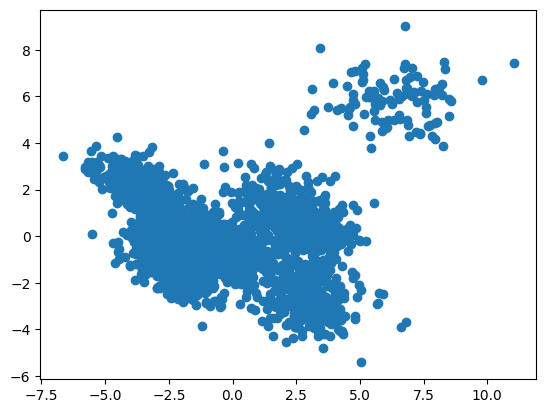

In [4]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
X_trans = pca.fit_transform(X_stand)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()

#2 Decision tree learning


### 2.1 Computing score

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score

n = len(X)
labels = range(0, n)
scores = []
for i in np.arange(0.05, 1, 0.05):
  model = DecisionTreeClassifier(criterion='entropy',
                                 min_impurity_decrease=i)
  model.fit(X, labels)
  labels = model.apply(X)
  sil = silhouette_score(X_stand, labels)
  scores.append({'param': round(i, 2),
                 'score': round(sil, 4)})
  
scores[:5]

[{'param': 0.05, 'score': -0.0493},
 {'param': 0.1, 'score': 0.0082},
 {'param': 0.15, 'score': 0.0325},
 {'param': 0.2, 'score': 0.0325},
 {'param': 0.25, 'score': 0.1129}]

###2.2 Visualizing score

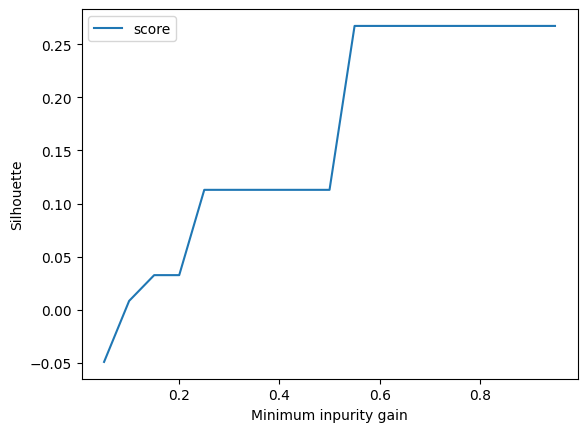

In [6]:
from matplotlib import pyplot as plt

param_list = [x['param'] for x in scores]
score_list = [x['score'] for x in scores]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Silhouette')
ax.set_xlabel('Minimum inpurity gain')
plt.plot(param_list, score_list, label='score')
ax.legend()
plt.show()

### 2.3 Computing score gain

In [7]:
scores[0]['diff'] = 0
for i, score in enumerate(scores):
  if i == 0:
    continue
  score['diff'] = score['score'] - scores[i-1]['score']

scores[:5]

[{'param': 0.05, 'score': -0.0493, 'diff': 0},
 {'param': 0.1, 'score': 0.0082, 'diff': 0.057499999999999996},
 {'param': 0.15, 'score': 0.0325, 'diff': 0.024300000000000002},
 {'param': 0.2, 'score': 0.0325, 'diff': 0.0},
 {'param': 0.25, 'score': 0.1129, 'diff': 0.0804}]

### 2.4 Visualizing score gain

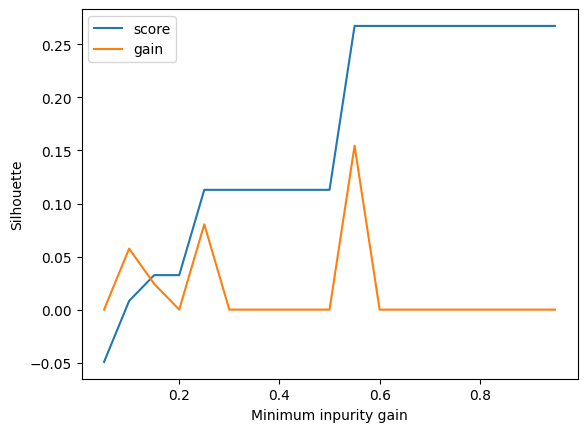

In [8]:
from matplotlib import pyplot as plt

param_list = [x['param'] for x in scores]
score_list = [x['score'] for x in scores]
diff_list = [x['diff'] for x in scores]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Silhouette')
ax.set_xlabel('Minimum inpurity gain')
plt.plot(param_list, score_list, label='score')
plt.plot(param_list, diff_list, label='gain')
ax.legend()
plt.show()

### 2.5 Построение реш. дерева

In [9]:
scores_sorted = sorted(scores, key=lambda x: x['diff'], reverse=True)
threshold = scores_sorted[0]['param']

labels = range(0, n)
model = DecisionTreeClassifier(criterion='entropy',
                               min_impurity_decrease=threshold)
model.fit(X, labels)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.55)

### 2.6 Визуализация дерева

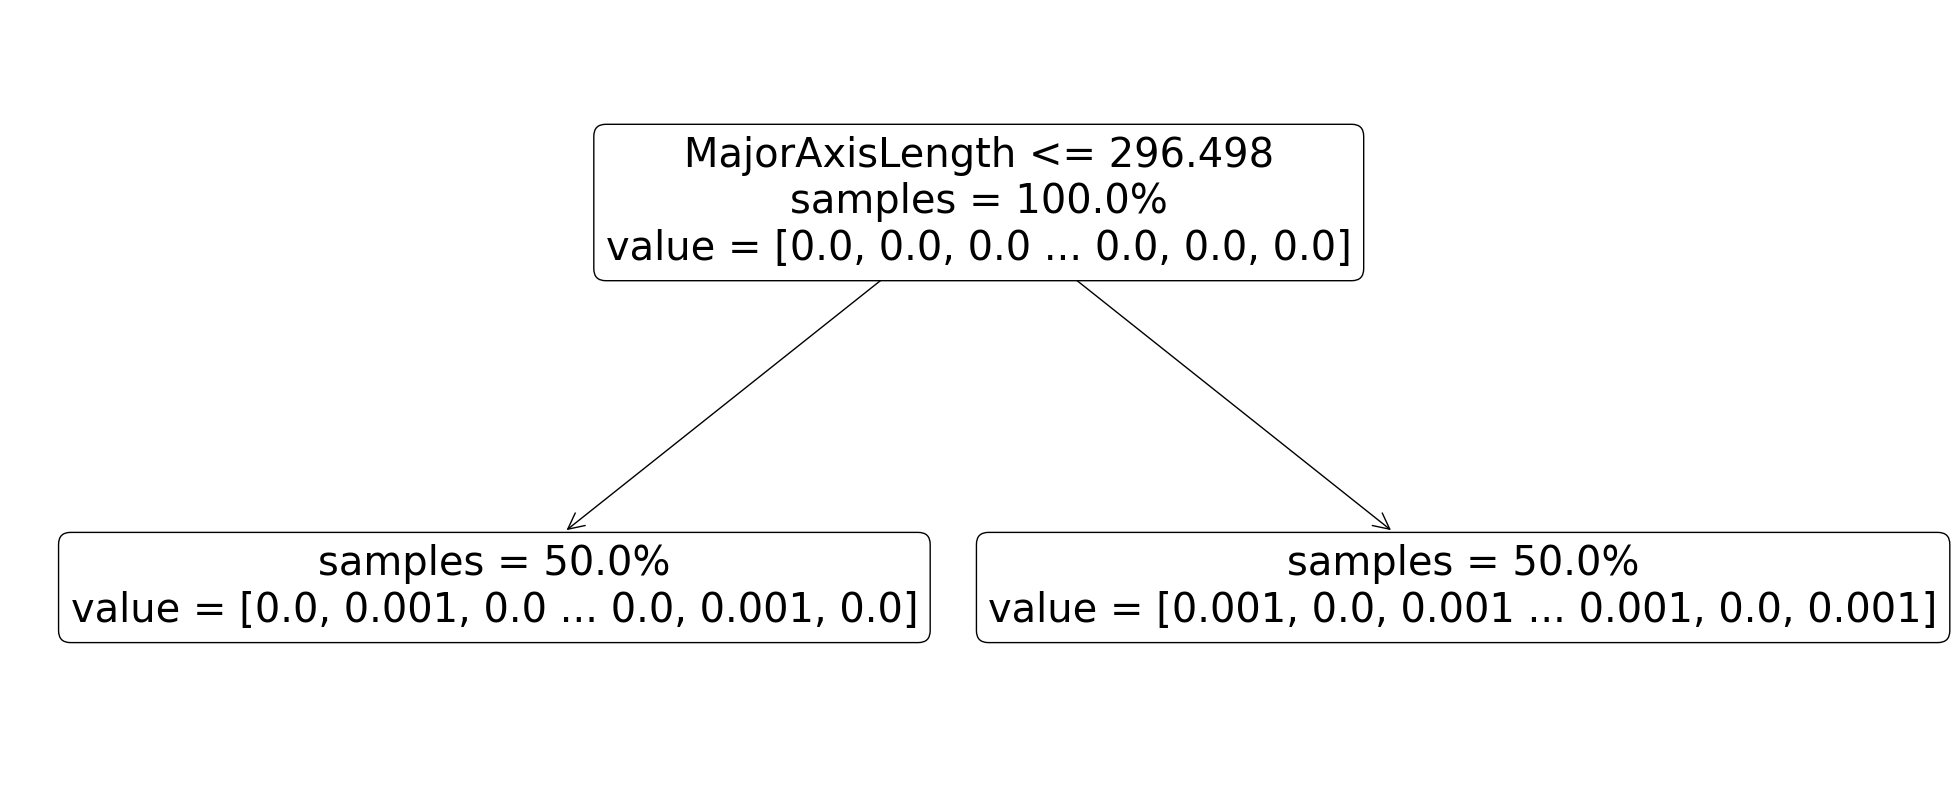

In [10]:
from sklearn import tree

fig = plt.figure(figsize=(25, 10))
tree.plot_tree(model,
               feature_names = X.columns,
               impurity=False,
               proportion=True,
               rounded=True)
plt.show()

# 3. Построение иерархии OWL классов

### 3.1 Извлечение данных из дерева

In [11]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
features = model.tree_.feature
thresholds = model.tree_.threshold

def make_node(i):
  node = {}
  node['parentID'] = i
  node['feature'] = X.columns[features[i]]
  node['threshold'] = round(thresholds[i], 2)
  return node

nodes = []
for i in range(0, n_nodes):
  if children_left[i] != -1:
    node = make_node(i)
    node['ID'] = children_left[i]
    node['comparison'] = '<='
    nodes.append(node)
  if children_right[i] != -1:
    node = make_node(i)
    node['ID'] = children_right[i]
    node['comparison'] = '>'
    nodes.append(node)

nodes[:5]

[{'parentID': 0,
  'feature': 'MajorAxisLength',
  'threshold': 296.5,
  'ID': 1,
  'comparison': '<='},
 {'parentID': 0,
  'feature': 'MajorAxisLength',
  'threshold': 296.5,
  'ID': 2,
  'comparison': '>'}]

### 3.2 Создание онтологии и свойства

In [12]:
%pip install owlready2==0.37

     ---------------------------------------- 23.8/23.8 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for owlready2: started
  Running setup.py install for owlready2: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: owlready2 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [13]:
from owlready2 import *
import types

onto = get_ontology('onto.owl')

with onto:
  for feature in X.columns:
    onto_feature = types.new_class(feature, (DataProperty,))

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


###3.3 Создание классов

In [14]:
with onto:
  for node in nodes:
    parent = node['parentID']
    if parent == 0:
      onto_parent = Thing
    else:
      onto_parent = onto[f'Class_{parent}']
    onto_class = types.new_class(f'Class_{node["ID"]}', (onto_parent,))

    onto_feature = onto[node['feature']]
    threshold = node['threshold']
    if node['comparison'] == '<=':
      onto_class.equivalent_to.append(onto_feature.some(
          ConstrainedDatatype(float, max_inclusive = threshold)))
    else:
      onto_class.equivalent_to.append(onto_feature.some(
          ConstrainedDatatype(float, min_exclusive = threshold)))

onto.save('onto.owl', format='ntriples')

### 3.4 Создание сущностей

In [15]:
i = 0

with onto:
  row = X.loc[i]
  inst = Thing(f'inst{i}')
  for feature in X.columns:
    onto_feature = onto[feature]
    onto_feature[inst].append(float(row[feature]))

### 3.5 Classifying with the reasoning

In [16]:
with onto:
  sync_reasoner_pellet()
  print(inst.is_a)

onto.save('onto_classified.owl', format='ntriples')

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\owlready2\pellet\antlr-3.2.jar;C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\owlready2\pellet\antlr-runtime-3.2.jar;C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\owlready2\pellet\aterm-java-1.6.jar;C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\owlready2\pellet\commons-codec-1.6.jar;C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\owlready2\pellet\httpclient-4.2.3.jar;C:\Users\markg\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

[onto.Class_2]


* Owlready2 * Pellet took 0.9319028854370117 seconds
* Owlready * Reparenting onto.inst0: {owl.Thing} => {onto.Class_2}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)
